# 0.0 Imports

In [1]:
import math
import inflection
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.display import HTML
pd.__version__

'1.3.4'

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
# Raw seria a marcação de arquivo que não foi limpo ainda (acabou de ler)
df_sales_raw = pd.read_csv("train.csv",low_memory = False)
df_store_raw = pd.read_csv("store.csv",low_memory = False)

In [3]:
# Merge (método da classe pandas) 1arg- documento que será referencia 2arg- arquivo que será anexado how:como fará e on a coluna em comum
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")

# 1.0 Descricao dos Dados

In [4]:
#fazer cópia dos dados, para não usar em cima do original
df1 = df_raw.copy()

In [5]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# função para deixar a lista em minúsculo e em snakecase(_)
snakecase = lambda x: inflection.underscore (x)
cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [8]:
print ("Number of Rows:{}".format(df1.shape[0]))
print ("Number of Cols:{}".format(df1.shape[1]))

Number of Rows:1017209
Number of Cols:18


## 1.3 Data Types

In [9]:
# mudar a data de object para forma de data
df1["date"] = pd.to_datetime(df1["date"])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA (Substituindo os dados faltantes)

In [11]:
### 3 formas de tratar os "na"
### 1- exclui, mas perde informação
### 2- ML para substituição no comportameno da coluna (Mediana ou media clusterização ou predição dos valores vazios)
### 3-pensar no negócio (pq gerou o NA)

In [12]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
108535,381,6,2015-04-25,5180,515,1,0,0,0,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [13]:
df1["competition_distance"].max()

75860.0

In [14]:
#competition_distance colocar 0 no lugar de NA Lambda é assim pq só tem 1 coluna
df1["competition_distance"] = df1["competition_distance"].apply (lambda x:200000.0 if math.isnan(x) else x)

#competition_open_since_month aqui aplica assim pq tem mais de uma coluna para analisar (por isso o Axis:1, se fosse axis 0 seria ao longo da linha)
df1["competition_open_since_month"] = df1.apply(lambda x: x["date"].month if math.isnan( x["competition_open_since_month"]) else x["competition_open_since_month"], axis=1)

#competition_open_since_year
df1["competition_open_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan( x["competition_open_since_year"]) else x["competition_open_since_year"], axis=1)

#promo2_since_week
df1["promo2_since_week"] = df1.apply(lambda x: x["date"].week if math.isnan( x["promo2_since_week"]) else x["promo2_since_week"], axis=1)

#promo2_since_year
df1["promo2_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan( x["promo2_since_year"]) else x["promo2_since_year"], axis=1)


In [15]:
#promo_interval Inplace=True faz a modificação direto na coluna e Fillna vai preencher com 0
month_map={1:"Jan", 2:"Fev", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df1["promo_interval"].fillna(0, inplace=True)

#Mapeia a o dicionario dentro da coluna (para saber se está dentro da promoção, se 0 não participa da promoção se 1 participa)
df1["month_map"] = df1["date"].dt.month.map(month_map)

df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(",") else 0, axis=1)


In [16]:
#T = Transpose
df1.sample(5).T

,900272,805446,734457,304922,165220
store,138,87,458,347,201
day_of_week,1,2,3,7,4
date,2013-04-15 00:00:00,2013-07-09 00:00:00,2013-09-11 00:00:00,2014-10-19 00:00:00,2015-03-05 00:00:00
sales,5747,5654,7130,0,5902
customers,649,788,672,0,430
open,1,1,1,0,1
promo,0,0,1,0,1
state_holiday,0,0,0,0,0
school_holiday,0,1,0,0,0
store_type,a,a,c,d,d


In [17]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types (Estatística Descritiva)


In [ ]:
df1.dtypes

In [ ]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)

In [18]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical 

In [19]:
#numérico
num_attributes = df1.select_dtypes(include=["int64", "float64"])
#categórico
cat_attributes = df1.select_dtypes(exclude=["int64", "float64","datetime64[ns]"])

In [20]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
543226,1007,7,0,0,0,0,0,4180.0,9.0,2012.0,0,9.0,2014.0,0
545796,232,4,2722,280,1,0,0,13570.0,5.0,2010.0,1,10.0,2013.0,0
799218,549,1,5615,597,1,1,1,2330.0,7.0,2013.0,0,29.0,2013.0,0
566941,192,6,10004,766,1,0,0,2770.0,3.0,2008.0,1,40.0,2014.0,0
536514,985,6,6469,734,1,0,0,490.0,5.0,2007.0,1,13.0,2010.0,0


In [21]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
303240,0,c,a,"Feb,May,Aug,Nov",Oct
138365,0,a,a,0,Mar
156484,0,d,a,0,Mar
865946,0,a,c,"Feb,May,Aug,Nov",May
754011,0,d,c,0,Aug


### 1.7.1 Numerical Attributes 

In [22]:
#obs. T = Transpose
# Noção de negocios a partir dessas métricas(m) e erros

# Central Tendency - Mean Median
# média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
# mediana
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtsosis
# Desvio padrão
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
# mínimo
d2 = pd.DataFrame(num_attributes.apply(min)).T
# máximo
d3 = pd.DataFrame(num_attributes.apply(max)).T

# Range
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
# Skew
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
# Kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate da classe pandas na ordem na lista que quero ver
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
# dá nome as colunas
m.columns = (["attributes", "mim", " max", "range","mean" ,"median" ,"std" ,"skew" ,"kurtosis"])
m

,attributes,mim,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/Users/raquelrocha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

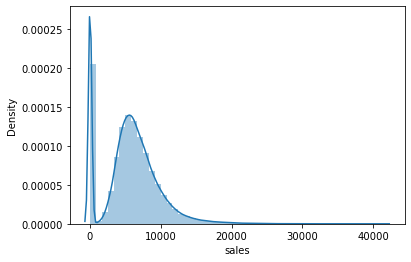

In [23]:
# Exemplo da distribuição das vendas(sales)
sns.distplot( df1["sales"])

/Users/raquelrocha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

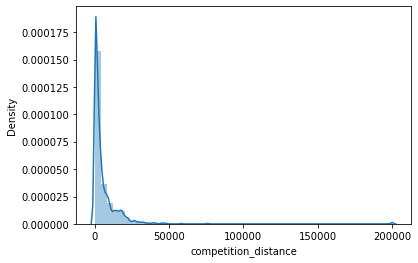

In [24]:
# Exemplo da distribuição da competition_distance
sns.distplot( df1["competition_distance"])

### 1.7.2 Categorical Attributes (Boxplot - vc tem medidas de desperção e tendência central em um local só ) 

In [25]:
# níveis cada variável categórica tem
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

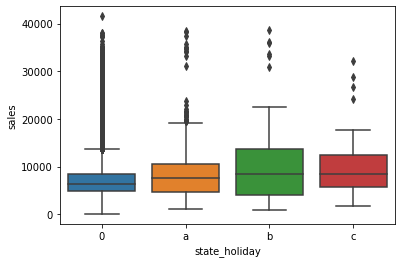

In [26]:
# Construir o boxplot
# Filtro 2 condições state_holiday e sales 
aux1 = df1[(df1["state_holiday"] !=0) & (df1["sales"] >0)]
# x(linha de referência ,nome da categoria) Y(o que vai medir, a dispersão data(dataframe)) 
sns.boxplot(x="state_holiday", y="sales", data=aux1)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

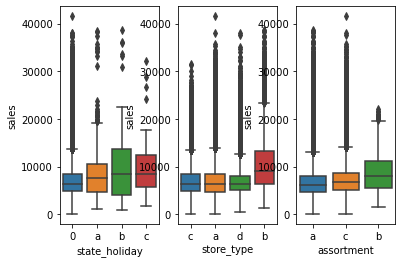

In [27]:
#colocando outras variáveis lado a lado
aux1 = df1[(df1["state_holiday"] !=0) & (df1["sales"] >0)]

plt.subplot (1, 3, 1)
sns.boxplot(x="state_holiday", y="sales", data=aux1)

plt.subplot (1, 3, 2)
sns.boxplot(x="store_type", y="sales", data=aux1)

plt.subplot (1, 3, 3)
sns.boxplot(x="assortment", y="sales", data=aux1)